In [3]:
import pandas as pd
import numpy as np
import math

In [364]:
def normalize(dataset, mu, std):
    cols = list(dataset.columns)
    for c in cols:
        if c == 'y':
            continue
        for i in range(len(dataset)): 
            val = (dataset.iloc[i][c] - mu[c])/std[c]
            dataset.at[i,c] = val
    return dataset

In [365]:
def get_dis2label(point, dataset, A):
    distances = []
    p = np.array(point)
    Y = np.array(dataset.y)
    X = dataset.drop(columns = 'y')
    for r in X.itertuples():
        x = np.array(r[1:])
        diff = np.array([x[i]-p[i] for i in range(len(p))])
        dis = math.sqrt(abs(np.dot(np.dot(diff.transpose(), A), diff)))
        distances.append(dis)
    dis2label = pd.DataFrame(Y,distances).reset_index()
    dis2label.columns = ["distance","y"]
    return dis2label.sort_values(by=['distance']).reset_index(drop = True)

In [366]:
def read_file(filename, path = "./"):
    data = pd.read_csv(path+filename, sep=" ", header = None)#.reset_index(drop = True)
    c = []  #naming columns
    for i in range(len(data.columns)-1):
        c.append('x'+str(i))
    c.append('y')
    data.columns = c
    return data

In [409]:
def single_1NN(point, dataset, A):
    dis2label = get_dis2label(point, dataset, A).reset_index(drop = True)
    return dis2label.iloc[0]['y']

In [368]:
def predict(test, training, A):
    predictions = []
    for i in range(len(test)):
        predictions.append(single_1NN(test.iloc[i],training, A))
    return predictions

In [369]:
def evaluate(pred, dataset):
    if len(pred) != len(dataset):
        print("Wrong pred length!")
        return
    n = len(dataset)
    w = 0  #number of wrong predictions 
    for i in range(n):
        if pred[i] != dataset.iloc[i]['y']:
            w +=1 ;
    return w/n

# Question 8

In [179]:
training_set = read_file('D2z.txt')
test_set = []
for i in np.arange(-2,2,0.1):
    for j in np.arange(-2,2,0.1):
        test_set.append([i,j])
test_set = pd.DataFrame(test_set).reset_index(drop=True)
test_set.columns = ("x0","x1")

In [164]:
A = np.identity(2)
pred = predict(test_set,training_set,A)

In [180]:
test_set['y'] = pred

In [181]:
pred_0 = test_set.loc[test_set.y == 0]
pred_1 = test_set.loc[test_set.y == 1]
true_0 = training_set.loc[training_set.y == 0]
true_1 = training_set.loc[training_set.y == 1]

In [182]:
import matplotlib.pyplot as plt

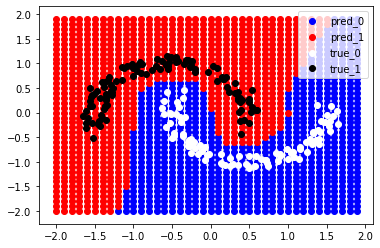

In [183]:
plt.scatter(pred_0.x0,pred_0.x1,color = "b",label = "pred_0")
plt.scatter(pred_1.x0,pred_1.x1,color = "r", label = "pred_1")
plt.scatter(true_0.x0,true_0.x1, color = "white",label = "true_0")
plt.scatter(true_1.x0,true_1.x1, color = "black",label = "true_1")
plt.legend()
plt.savefig("question8.pdf")

# Question 9

In [336]:
a = read_file("D2a.txt")
mu = dict()
std = dict()
cols = list(a.columns)
for c in cols:
    if c == 'y':
        continue     
    mu[c] = np.mean(a[c])
    std[c] = np.std(a[c])

In [338]:
#normalization
a_norm = read_file("D2a.txt")
a_norm = normalize(a_norm, mu, std)

In [306]:
from random import shuffle

def CV_partition(dataset, n = 5):
    """
    return indices of n-fold training and test sets
    """
    l = len(train_a)
    step = int(l/n)
    index = list(range(0,l))
    shuffle(index)
    train_sets = []
    test_sets = []
    s = 0
    for e in range(step,l+step,step):
        test_ind = [index[i] for i in range(s,e)]
        test_sets.append(test_ind)
        train_sets.append([i for i in index if i not in test_ind])
        s += step
    return (train_sets,test_sets)

In [400]:
trains,tests = CV_partition(a, 5)

In [401]:
train_sets = []
test_sets = []
norm_train_sets = []
norm_test_sets = []
for i in range(len(trains)):
    train_sets.append(a.loc[trains[i]].reset_index(drop = True))
    test_sets.append(a.loc[tests[i]].reset_index(drop = True))
    norm_train_sets.append(a_norm.iloc[trains[i]].reset_index(drop = True))
    norm_test_sets.append(a_norm.iloc[tests[i]].reset_index(drop = True))

In [414]:
err = []
for i in range(len(trains)):
    pred = predict(test_sets[i].drop(columns = 'y',axis = 0),train_sets[i],np.identity(6))
    err.append(evaluate(pred,test_sets[i]))
err.append(np.mean(err))

In [415]:
err

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [416]:
norm_err = []
for i in range(len(trains)):
    pred = predict(norm_test_sets[i].drop(columns = 'y',axis = 0),norm_train_sets[i],np.identity(6))
    norm_err.append(evaluate(pred,norm_test_sets[i]))
norm_err.append(np.mean(norm_err))

In [417]:
norm_err

[0.075, 0.075, 0.1, 0.05, 0.05, 0.06999999999999999]

# Question 10

In [441]:
b = read_file("D2b.txt")
mu_b = dict()
std_b = dict()
cols_b = list(b.columns)
for c in cols_b:
    if c == 'y':
        continue     
    mu_b[c] = np.mean(b[c])
    std_b[c] = np.std(b[c])
    
#normalization
b_norm = read_file("D2b.txt")
b_norm = normalize(b_norm, mu_b, std_b)

In [442]:
b_trains,b_tests = CV_partition(b, 5)

In [443]:
b_train_sets = []
b_test_sets = []
b_norm_train_sets = []
b_norm_test_sets = []
for i in range(len(b_trains)):
    b_train_sets.append(b.loc[b_trains[i]].reset_index(drop = True))
    b_test_sets.append(b.loc[b_tests[i]].reset_index(drop = True))
    b_norm_train_sets.append(b_norm.iloc[b_trains[i]].reset_index(drop = True))
    b_norm_test_sets.append(b_norm.iloc[b_tests[i]].reset_index(drop = True))

In [444]:
b_err = []
for i in range(len(trains)):
    pred = predict(b_test_sets[i].drop(columns = 'y',axis = 0),b_train_sets[i],np.identity(2))
    b_err.append(evaluate(pred,b_test_sets[i]))
b_err.append(np.mean(b_err))
b_err

[0.2, 0.25, 0.2, 0.2, 0.15, 0.2]

In [445]:
b_norm_err = []
for i in range(len(trains)):
    pred = predict(b_norm_test_sets[i].drop(columns = 'y',axis = 0),b_norm_train_sets[i],np.identity(2))
    b_norm_err.append(evaluate(pred,b_norm_test_sets[i]))
b_norm_err.append(np.mean(b_norm_err))
b_norm_err

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Question 12

In [437]:
for i in range(5):
    train_sets[i].to_csv("a_train_"+str(i)+".csv")
    test_sets[i].to_csv("a_test_"+str(i)+".csv")
    norm_train_sets[i].to_csv("norm_a_train_"+str(i)+".csv")
    norm_test_sets[i].to_csv("norm_a_test_"+str(i)+".csv")
    b_train_sets[i].to_csv("b_train_"+str(i)+".csv")
    b_test_sets[i].to_csv("b_test_"+str(i)+".csv")
    b_norm_train_sets[i].to_csv("norm_b_train_"+str(i)+".csv")
    b_norm_test_sets[i].to_csv("norm_b_test_"+str(i)+".csv")

In [448]:
a.to_csv("a.csv")
# print(a)
a_norm.to_csv("norm_a.csv")
# print(a_norm)
b.to_csv("b.csv")
# print(b)
b_norm.to_csv("norm_b.csv")
# print(b_norm)

In [449]:
c = read_file("D2b.txt")

In [450]:
c.to_csv("test.csv")